## Data Pre-Processing Assignment 3

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing The Titanic Dataset 

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
cor = data.corr()
cor

C:\Users\DELL\AppData\Local\Temp\ipykernel_1476\3874061444.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Checking and Handling the Null Values

In [12]:
data.isnull().any() #Checking if null values are present

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
# Null values are present in Age, Cabin, Embarked

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Cabin column has null values 687 out of 891 entries 
# That is like, 77% of the whole data in column is null.
# So its better to drop the column

In [16]:
data.drop("Cabin",axis=1,inplace=True)

In [17]:
data.head() #cabin removed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [19]:
# Now fill the null values in Embark and Age column

In [20]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [21]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Visualisation

C:\Users\DELL\AppData\Local\Temp\ipykernel_1476\670475791.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=data["Survived"],y=data["Embarked"],ci=0)


<Axes: xlabel='Survived', ylabel='Embarked'>

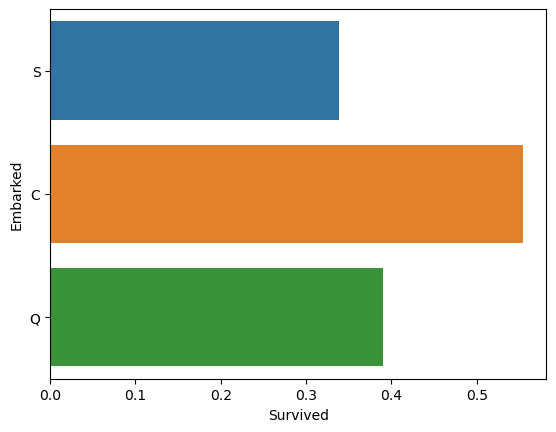

In [24]:
sns.barplot(x=data["Survived"],y=data["Embarked"],ci=0)

In [25]:
# Inference :
"""
from the above bar graph, it can be said that people who embarked
their journey from Cherbourg (C - 0.45) had a higher chance of survival than 
the people who boarded from Southampton (S - 0.31) or Queenstown (Q - 0.41).

"""

'\nfrom the above bar graph, it can be said that people who embarked\ntheir journey from Cherbourg (C - 0.45) had a higher chance of survival than \nthe people who boarded from Southampton (S - 0.31) or Queenstown (Q - 0.41).\n\n'

<Axes: >

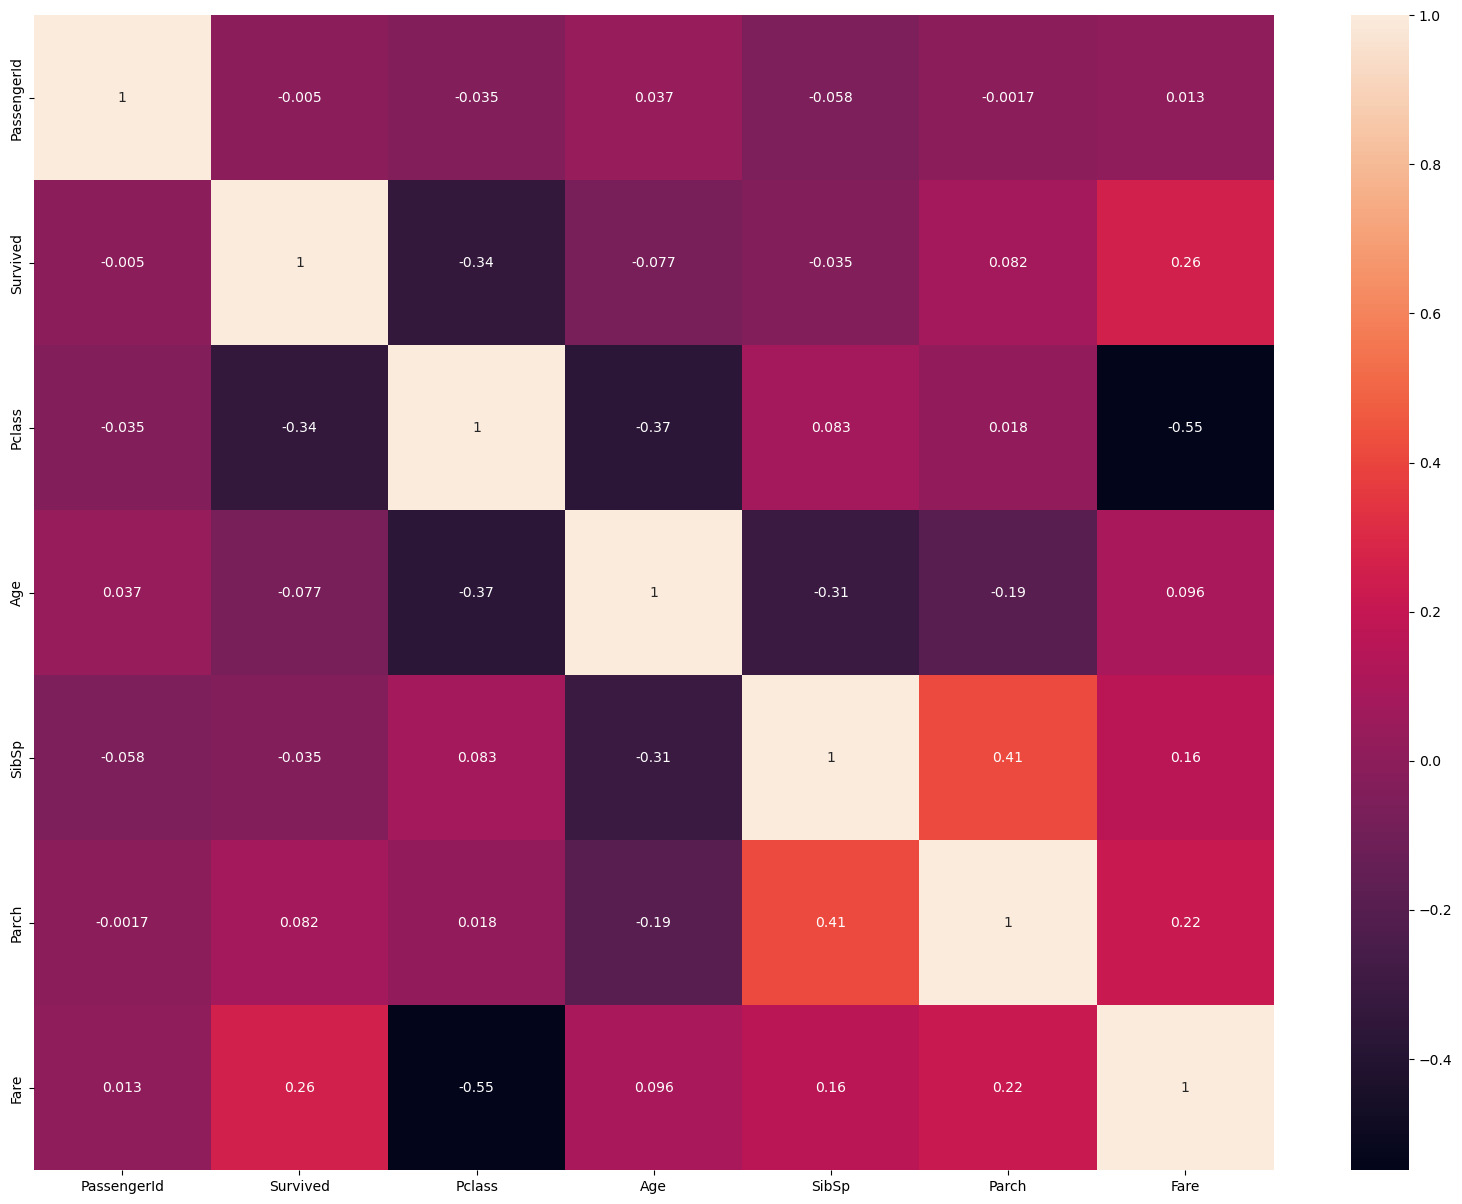

In [26]:
plt.subplots(figsize=(20,15))
sns.heatmap(cor,annot=True)

### Outliers Detection

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

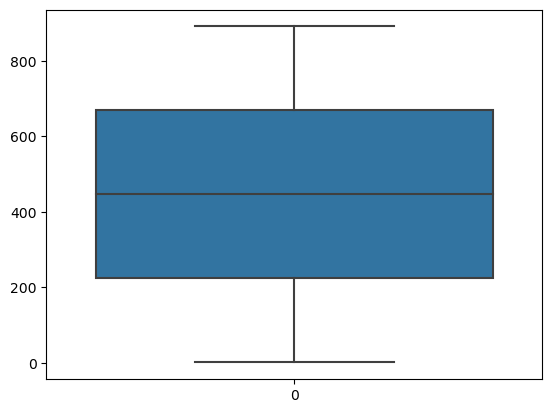

In [28]:
sns.boxplot(data.PassengerId)

<Axes: >

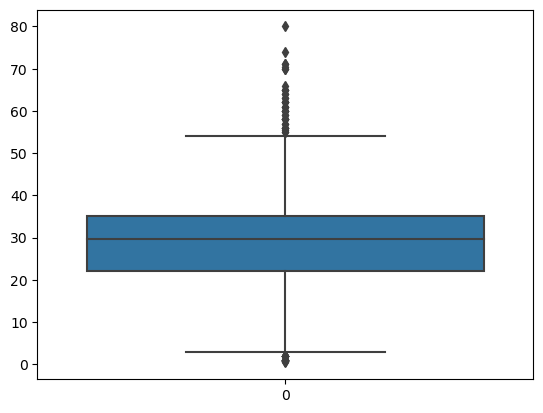

In [29]:
sns.boxplot(data.Age)

<Axes: >

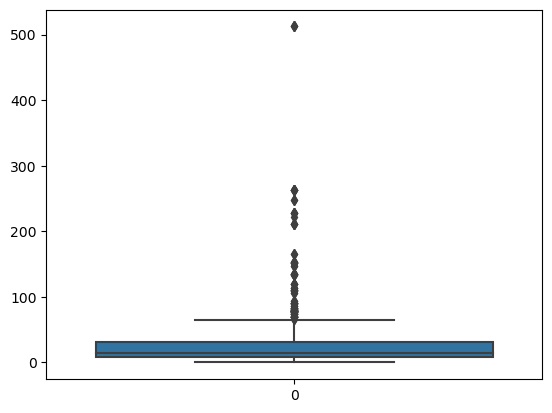

In [30]:
sns.boxplot(data.Fare)

In [31]:
# Outliers can be found in Age and Fare Columns

In [32]:
q1= data.Age.quantile(0.25)# finding q1 formula
q3= data.Age.quantile(0.75)# finding q3 formula

In [33]:
IQR = q3-q1 
IQR

13.0

In [34]:
upper_limit = q3+1.5*(IQR)
upper_limit

54.5

In [35]:
data=data[data.Age<upper_limit]

<Axes: >

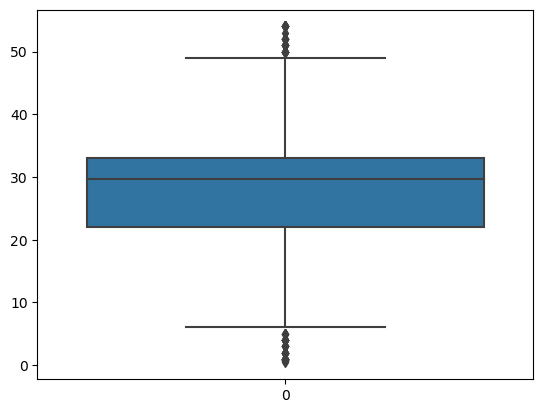

In [36]:
sns.boxplot(data.Age)

In [37]:
q1= data.Fare.quantile(0.25)# finding q1 formula
q3= data.Fare.quantile(0.75)# finding q3 formula

In [38]:
IQR = q3-q1 
IQR

22.6042

In [39]:
up_limit = q3+1.5*(IQR)
up_limit

64.4063

In [40]:
data=data[data.Fare<up_limit]

<Axes: >

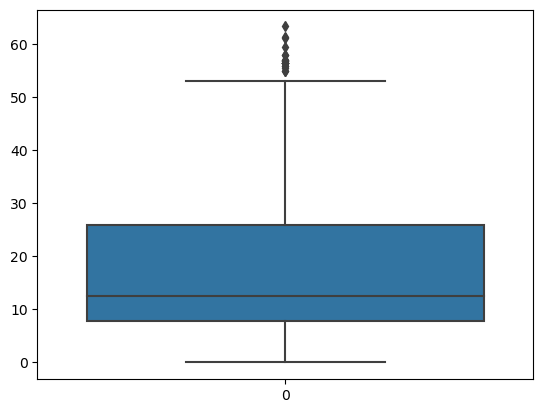

In [41]:
sns.boxplot(data.Fare)

### Encoding (Label Encoding)

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
data["Sex"]=le.fit_transform(data["Sex"])

In [46]:
data["Sex"]

0      1
2      0
3      0
4      1
5      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 741, dtype: int32

In [47]:
data["Sex"].value_counts()

1    503
0    238
Name: Sex, dtype: int64

In [48]:
data["Sex"].nunique()

2

### Splitting Data into Dependent and Independent Variables

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Q


In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Q


In [51]:
# Independent columns are:
'''
Passenger Id
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Embarked
'''

'\nPassenger Id\nSurvived\nPclass\nName\nSex\nAge\nSibSp\nParch\nEmbarked\n'

In [52]:
x = data.drop(columns = ['Survived'],axis=1)
y = data['Survived']

In [53]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
2,3,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
5,6,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Q


In [54]:
y.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

In [55]:
x.shape

(741, 10)

In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  741 non-null    int64  
 1   Pclass       741 non-null    int64  
 2   Name         741 non-null    object 
 3   Sex          741 non-null    int32  
 4   Age          741 non-null    float64
 5   SibSp        741 non-null    int64  
 6   Parch        741 non-null    int64  
 7   Ticket       741 non-null    object 
 8   Fare         741 non-null    float64
 9   Embarked     741 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 76.9+ KB


In [57]:
type(x)

pandas.core.frame.DataFrame

In [58]:
y.shape

(741,)

In [59]:
type(y)

pandas.core.series.Series

### Splitting Dataset into Train and Test Data

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((592, 10), (149, 10), (592,), (149,))

### Feature Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [63]:
data.drop("Name", axis = 1, inplace = True)

In [64]:
data.drop("Ticket", axis = 1, inplace = True)

In [65]:
data.drop("Embarked", axis = 1, inplace = True)

In [66]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
5,6,0,3,1,29.699118,0,0,8.4583


In [67]:
data_Scaled = pd.DataFrame(ms.fit_transform(data), columns = data.columns)

In [68]:
data_Scaled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.000000,0.0,1.0,1.0,0.402762,0.2,0.0,0.114429
1,0.002247,1.0,1.0,0.0,0.477417,0.0,0.0,0.125082
2,0.003371,1.0,0.0,0.0,0.645390,0.2,0.0,0.838091
3,0.004494,0.0,1.0,1.0,0.645390,0.0,0.0,0.127055
4,0.005618,0.0,1.0,1.0,0.546456,0.0,0.0,0.133499
